In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'D:\Download folder\Machine Learning 2\Time Series Analysis 1\Comprehension for Practice\bitcoinfinal+(4).csv', header = None)
data.columns = ['Month_Passed','Avg_Price']
#data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month_Passed')
data.head(12)

,Avg_Price
Month_Passed,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Avg_Price  32 non-null     float64
dtypes: float64(1)
memory usage: 512.0 bytes


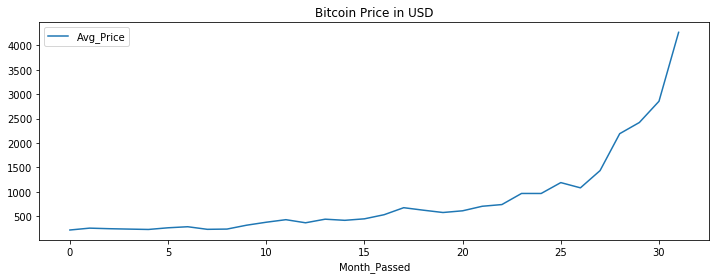

In [5]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Bitcoin Price in USD')
plt.show(block=False)

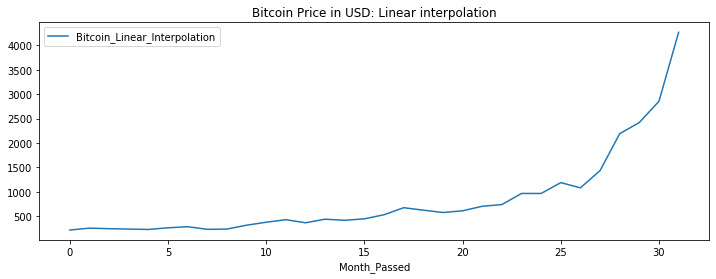

In [7]:
data = data.assign(Bitcoin_Linear_Interpolation=data.Avg_Price.interpolate(method='linear'))
data[['Bitcoin_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Bitcoin Price in USD: Linear interpolation')
plt.show(block=False)

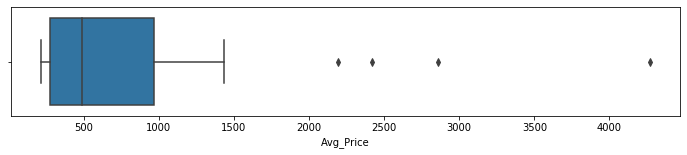

In [10]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Avg_Price'])

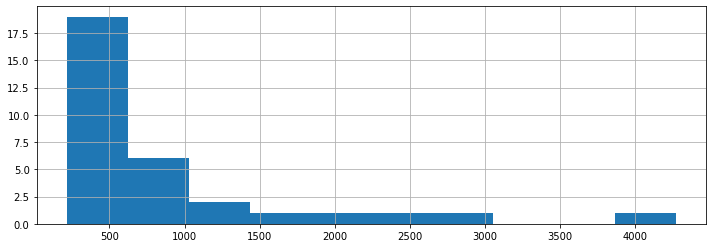

In [11]:
fig = data.Avg_Price.hist(figsize = (12,4))

# Build and evaluate time series forecast

## Split time series data into training and test set

In [13]:
train_len = 29
train = data[0:train_len] # first 29 price as training set
test = data[train_len:] # Rest as out-of-time test set

# Simple time series methods

## Naive method

In [14]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Avg_Price'][train_len-1]

### Plot train, test and forecast

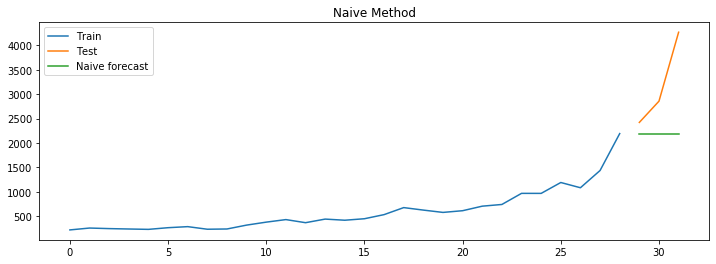

In [15]:
plt.figure(figsize=(12,4))
plt.plot(train['Avg_Price'], label='Train')
plt.plot(test['Avg_Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [16]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Avg_Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Avg_Price']-y_hat_naive['naive_forecast'])/test['Avg_Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


## Simple average method

In [17]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Avg_Price'].mean()

### Plot train, test and forecast

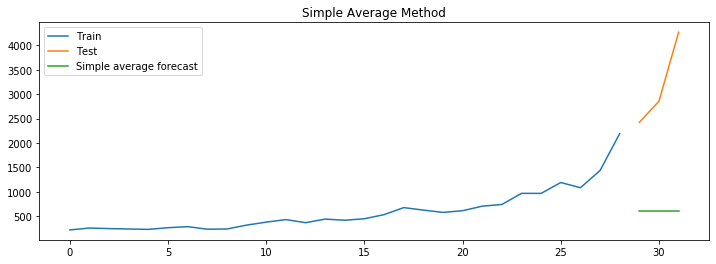

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['Avg_Price'], label='Train')
plt.plot(test['Avg_Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [19]:
rmse = np.sqrt(mean_squared_error(test['Avg_Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Avg_Price']-y_hat_avg['avg_forecast'])/test['Avg_Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19


## Simple moving average method

In [20]:
# With 12 Window
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Avg_Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

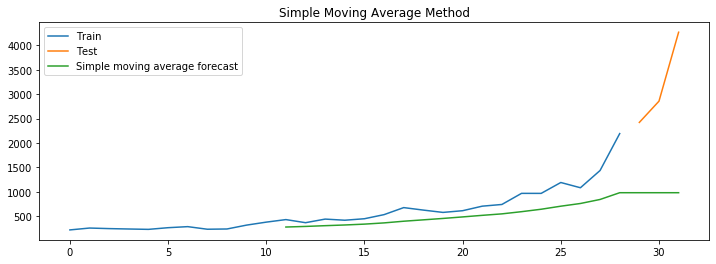

In [23]:
plt.figure(figsize=(12,4))
plt.plot(train['Avg_Price'], label='Train')
plt.plot(test['Avg_Price'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [24]:
rmse = np.sqrt(mean_squared_error(test['Avg_Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Avg_Price']-y_hat_sma['sma_forecast'][train_len:])/test['Avg_Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42


In [27]:
# With 6 Window
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['Avg_Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [28]:
rmse = np.sqrt(mean_squared_error(test['Avg_Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Avg_Price']-y_hat_sma['sma_forecast'][train_len:])/test['Avg_Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61


In [29]:
# With 3 Window
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Avg_Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [30]:
rmse = np.sqrt(mean_squared_error(test['Avg_Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Avg_Price']-y_hat_sma['sma_forecast'][train_len:])/test['Avg_Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81


# Exponential smoothing methods

## Simple exponential smoothing

In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Avg_Price'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

### Calculate RMSE and MAPE

In [32]:
rmse = np.sqrt(mean_squared_error(test['Avg_Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Avg_Price']-y_hat_ses['ses_forecast'])/test['Avg_Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12


## Holt's method with trend

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Avg_Price']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit( optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.42166543817420776, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 203.68784435912738, 'initial_slope': 13.714211507493342, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Calculate RSME and MAPE

In [34]:
rmse = np.sqrt(mean_squared_error(test['Avg_Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Avg_Price']-y_hat_holt['holt_forecast'])/test['Avg_Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.11,11.01


## Holt Winters' additive method with trend and seasonality

In [38]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Avg_Price']) ,seasonal_periods=3 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.9999, 'smoothing_slope': 0.42105263157894735, 'smoothing_seasonal': 0.0001, 'damping_slope': nan, 'initial_level': 559.53, 'initial_slope': 1.1444444444444395, 'initial_seasons': array([-342.13, -303.83, -315.23]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Calculate RMSE and MAPE

In [39]:
rmse = np.sqrt(mean_squared_error(test['Avg_Price'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Avg_Price']-y_hat_hwa['hw_forecast'])/test['Avg_Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.11,11.01
0,Holt Winters' additive method,509.49,10.26


## Holt Winter's multiplicative method with trend and seasonality

In [40]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Avg_Price']) ,seasonal_periods=3 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(3)

{'smoothing_level': 0.9999, 'smoothing_slope': 0.3157894736842105, 'smoothing_seasonal': 0.0001, 'damping_slope': nan, 'initial_level': 559.53, 'initial_slope': 1.1444444444444395, 'initial_seasons': array([0.38854038, 0.45699069, 0.43661645]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Calculate RMSE and MAPE

In [41]:
rmse = np.sqrt(mean_squared_error(test['Avg_Price'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Avg_Price']-y_hat_hwm['hw_forecast'])/test['Avg_Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2338.94,67.42
0,Simple moving average forecast,2035.79,56.61
0,Simple moving average forecast,1794.92,47.81
0,Simple exponential smoothing forecast,1265.90,27.12
0,Holt's exponential smoothing method,500.11,11.01
0,Holt Winters' additive method,509.49,10.26
0,Holt Winters' multiplicative method,735.31,15.38
